# Wiki Networking

### Introduction

Network graphs consisting of nodes and edges and be used to visualize the relationships between people. The results can inform a viewer of groups of relationships. This abbreviated example demonstrates how to crawl Wiki articles and represent the links between these articles as a graph.

In [ ]:
!pip install git+https://github.com/jchuahtacc/WikiNetworking.git

### `import` statements

First, we will import a few necessary packages, including `wikinetworking` from this repository. It includes functions for crawling and text mining Wiki data as well as graphing the result of the crawl.

In [6]:
import wikinetworking as wn
import networkx as nx
from pyquery import PyQuery
%matplotlib inline

print "OK"

OK


### Crawling strategy

In this crawl, we will create a network of all characters in the Marvel Cinematic Universe. The general strategy is:
- Get all links from pages of Marvel characters by crawling each alphabetical page with a URL that begins with `https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_`
- Get all links from [`https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_film_actors`](https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_film_actors)
- The intersection of these links should be just pages pertaining to Marvel Cinematic Universe characters
- Crawl articles starting with [Iron Man](https://en.wikipedia.org/wiki/Iron_Man) 
- Convert the crawl data to an undirected graph, and save the graph in a json file

### All Marvel Comics Characters

Get all Marvel Comics characters from the multi-page list, and filter only for those entries with dedicated page. These will have the `.hatnote` class.

In [7]:
sections = [letter for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ']
sections.append('0-9')
urls = ["https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_" + section for section in sections]

character_links = wn.retrieve_multipage(urls, ".hatnote", True)
wn.write_list(character_links, "marvel_character_links.txt")
print len(character_links), " Marvel Comics Character links retrieved"

Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_A
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_B
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_C
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_D
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_E
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_F
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_G
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_H
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_I
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_J
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_K
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_L
Retrieving https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_M

### Marvel Cinematic Universe links

Retrieve all links from the Marvel Cinematic Universe page.

In [8]:
mcu_page = PyQuery(url="https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_film_actors")
mcu_links = wn.filter_links(mcu_page)
wn.write_list(mcu_links, "mcu_links.txt")
print len(mcu_links), " Marvel Cinamtic Universe links retrieved"

834  Marvel Cinamtic Universe links retrieved


### Cross-reference links

Links that are on both lists should be links only to Marvel Cinematic Universe Characters.

In [9]:
mcu_characters = wn.intersection(character_links, mcu_links)
wn.write_list(mcu_characters, "mcu_characters.txt")
print len(mcu_characters), " Marvel Cinematic Universe Characters found"

118  Marvel Cinematic Universe Characters found


### Crawl the list

We will crawl the list starting at `/wiki/Iron_Man` and reject a few links manually identified as erroneous links.

In [11]:
mcu_crawl_data = wn.crawl("/wiki/Iron_Man", accept=mcu_characters, reject=["/wiki/Marvel_Comics", "/wiki/Marvel_Cinematic_Universe"])
mcu_undirected_graph = wn.undirected_graph(mcu_crawl_data)

wn.save_dict(mcu_undirected_graph, "mcu_network.json")
print wn.load_dict("mcu_network.json")

1: Retrieving /wiki/Iron_Man, (0 left in queue)
2: Retrieving /wiki/War_Machine, (54 left in queue)
3: Retrieving /wiki/Pepper_Potts, (55 left in queue)
4: Retrieving /wiki/Captain_America, (56 left in queue)
5: Retrieving /wiki/Hawkeye_(comics), (61 left in queue)
6: Retrieving /wiki/Ho_Yinsen, (64 left in queue)
7: Retrieving /wiki/Thanos, (63 left in queue)
8: Retrieving /wiki/Justin_Hammer, (78 left in queue)
9: Retrieving /wiki/Howard_Stark, (78 left in queue)
10: Retrieving /wiki/Maria_Stark, (77 left in queue)
11: Retrieving /wiki/Crimson_Dynamo, (76 left in queue)
12: Retrieving /wiki/Happy_Hogan_(comics), (79 left in queue)
13: Retrieving /wiki/Iron_Monger, (80 left in queue)
14: Retrieving /wiki/Quicksilver_(comics), (79 left in queue)
15: Retrieving /wiki/Scarlet_Witch, (80 left in queue)
16: Retrieving /wiki/Black_Panther_(comics), (82 left in queue)
17: Retrieving /wiki/Doctor_Strange, (87 left in queue)
18: Retrieving /wiki/Hank_Pym, (86 left in queue)
19: Retrieving /wik

### Graphing the data

The data can be graphed as an interactive graph, which can in turn be saved as an HTML file.

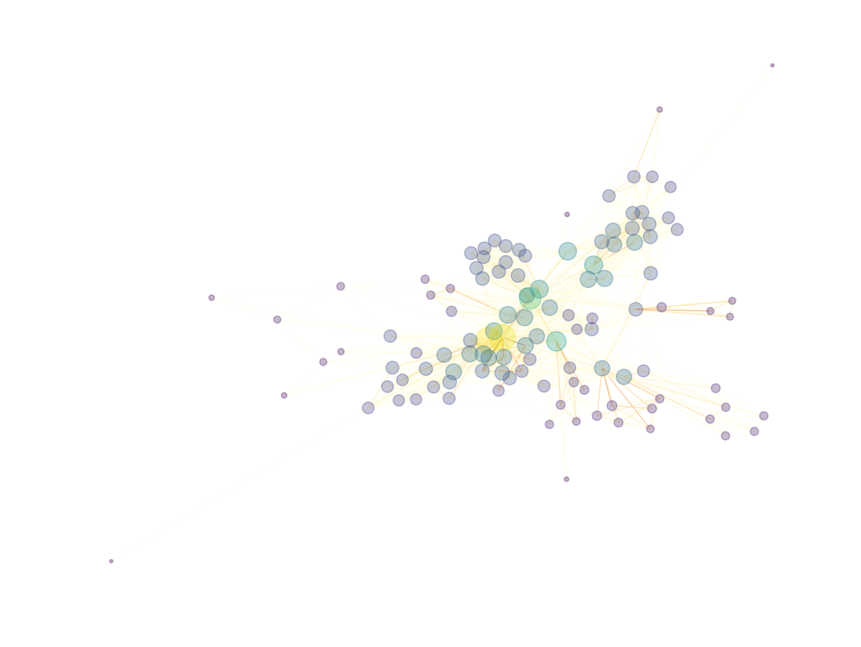

In [12]:
# Just in case you only want to run this cell and not re-run the crawl
import wikinetworking as wn
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

network = wn.load_dict("mcu_network.json")
graph = wn.create_graph(network, minimum_weight=2)
positions = nx.spring_layout(graph)
graph_html = wn.make_interactive_graph(graph, pos=positions, cmap=plt.cm.viridis, edge_cmap=plt.cm.YlOrBr)

with open("mcu_network.html", "w") as f:
    f.write(graph_html)
    f.close()